In [37]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import h5py
# import cvxpy as cvx
import os

from util import *
# from data_loader import * 
# from module_deconv import *
# from module_exp import *
from sc_deconv import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import scanpy.api as sc
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import pairwise_distances

sc.settings.verbosity = 3                # increase for more output
sc.settings.set_dpi(100)                  # low pixel number yields small inline figures
sc.logging.print_version_and_date()

Running Scanpy 0.4.2 on 2018-02-02 15:28.


In [3]:
import seaborn as sns

[ 2.4   2.15  1.2  -0.7  -5.  ]


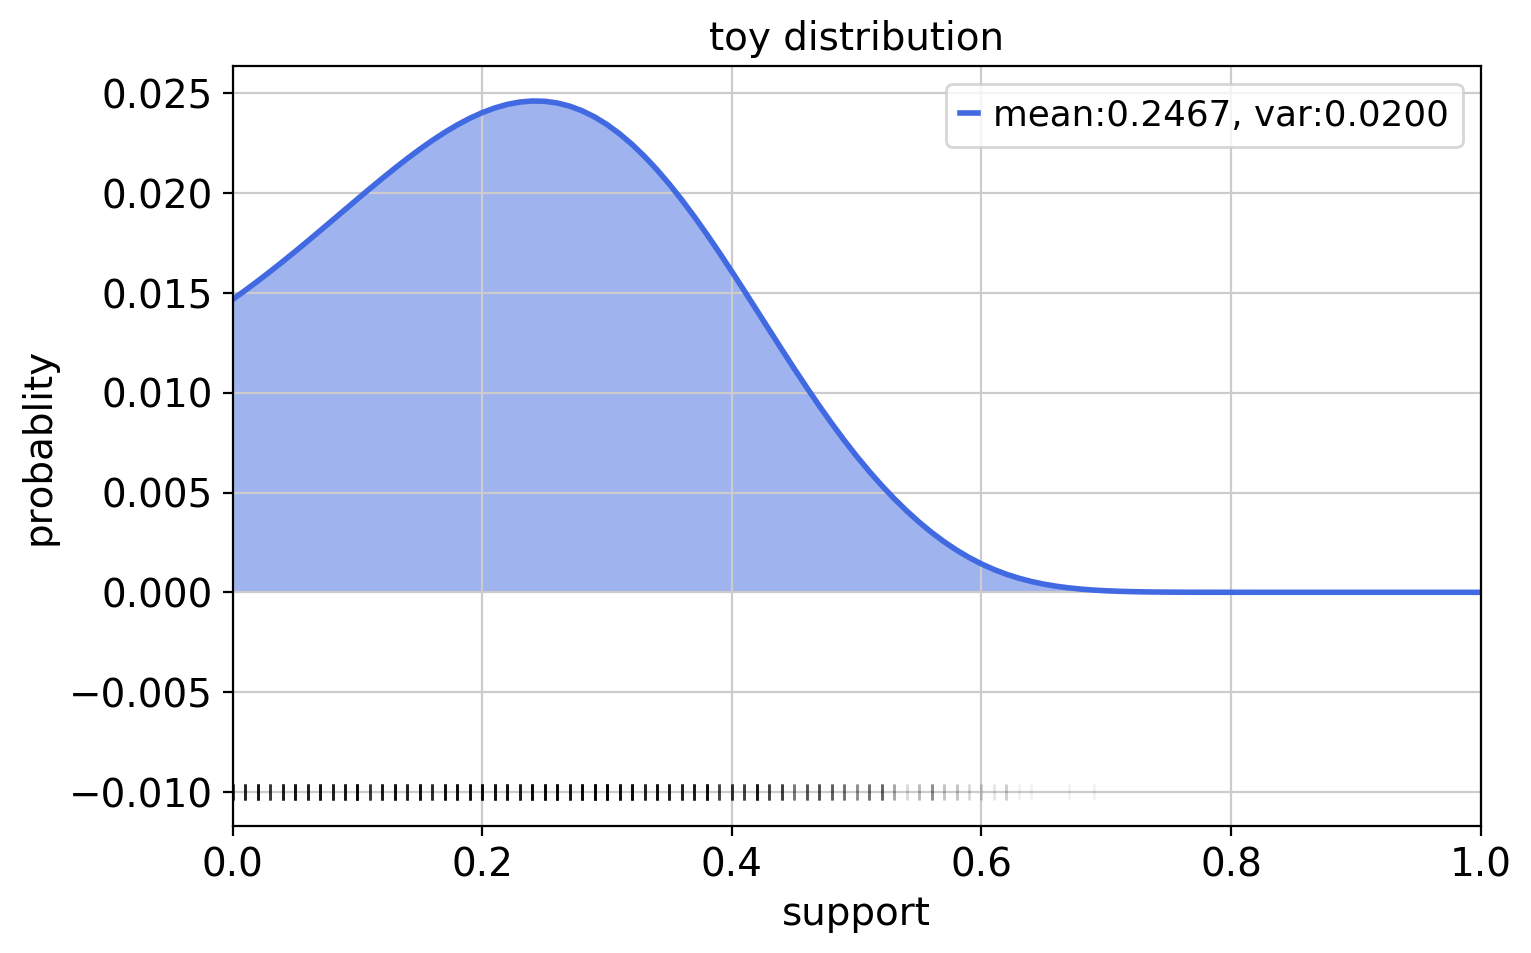

In [4]:
## creating a toy 1d distribution instance
np.random.seed(42)
p,x=toy_dist(vis=1,opt='1d_Q')

In [5]:
## generate the simulated read count data
N_c=8000
N_r=38
X,Y,data_info=data_gen_1d(p_hat,dd_info['x'],N_c,N_r,noise='poi',vis=1)

NameError: name 'p_hat' is not defined

### distribution estimation

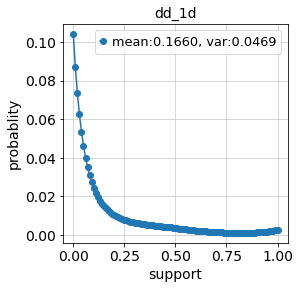

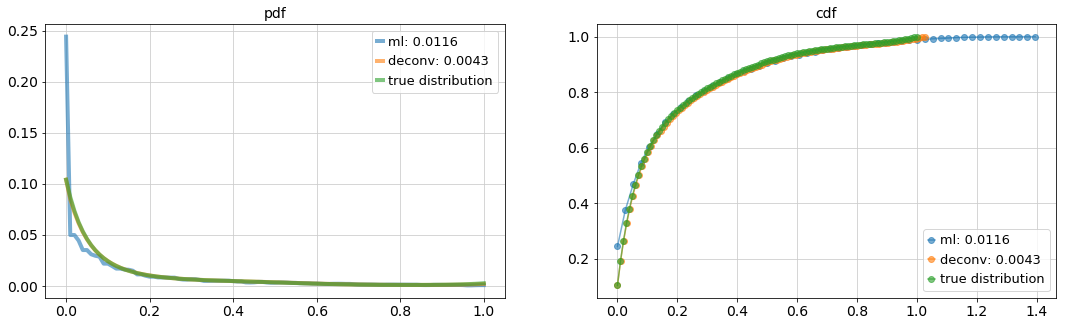

In [87]:
## distribution estimation
# input: Y  
# summary function: Y --> Y_pdf, Y_supp
# specify the scale of x and N_r 

p_hat,dd_info=dd_1d(Y,noise='poi',vis=1,N_r=None)
p_hat_ml,ml_info=ml_1d(Y)
_=plot_result_1d(p_hat,p_hat,p_hat_ml,dd_info,ml_info,data_info)

## 8k PBMC @ 100K rpc

In [6]:
filename_data = '/data/martin/single_cell/filtered_gene_bc_matrices/GRCh38/matrix.mtx'
filename_genes = '/data/martin/single_cell/filtered_gene_bc_matrices/GRCh38/genes.tsv'
filename_barcodes = '/data/martin/single_cell/filtered_gene_bc_matrices/GRCh38/barcodes.tsv'

In [7]:
%%time
adata = sc.read(filename_data, cache=True).transpose()
adata.var_names = np.genfromtxt(filename_genes, dtype=str)[:, 1]
adata.smp_names = np.genfromtxt(filename_barcodes, dtype=str)
sc.logging.print_memory_usage()

... writing an h5 cache file to speedup reading next time
Memory usage: current 0.24 GB, difference +0.24 GB
CPU times: user 51.9 s, sys: 607 ms, total: 52.5 s
Wall time: 52.7 s


CST3
Average counts per cell = 7.001789762558167


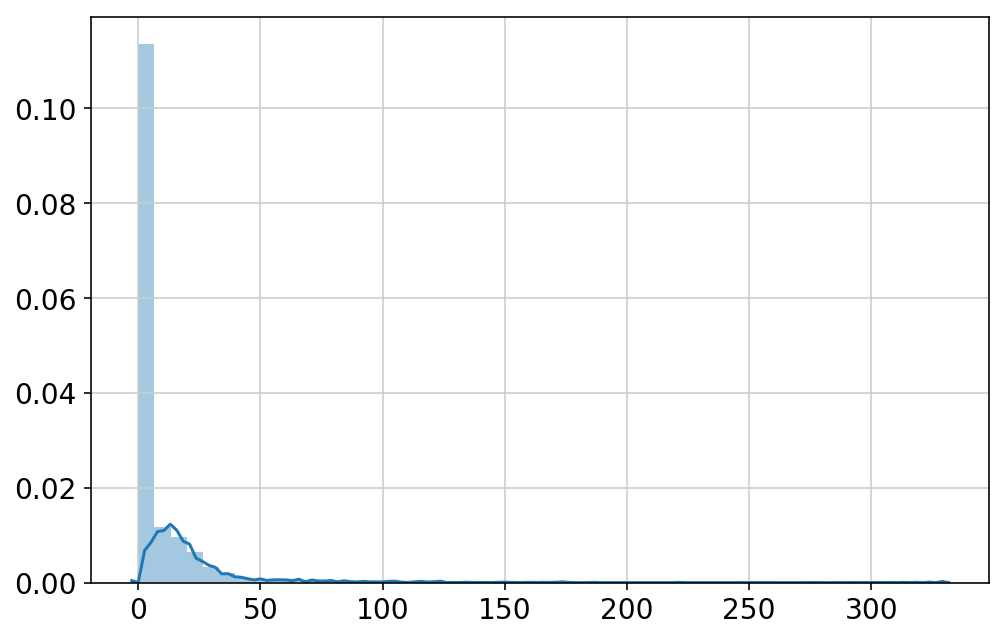

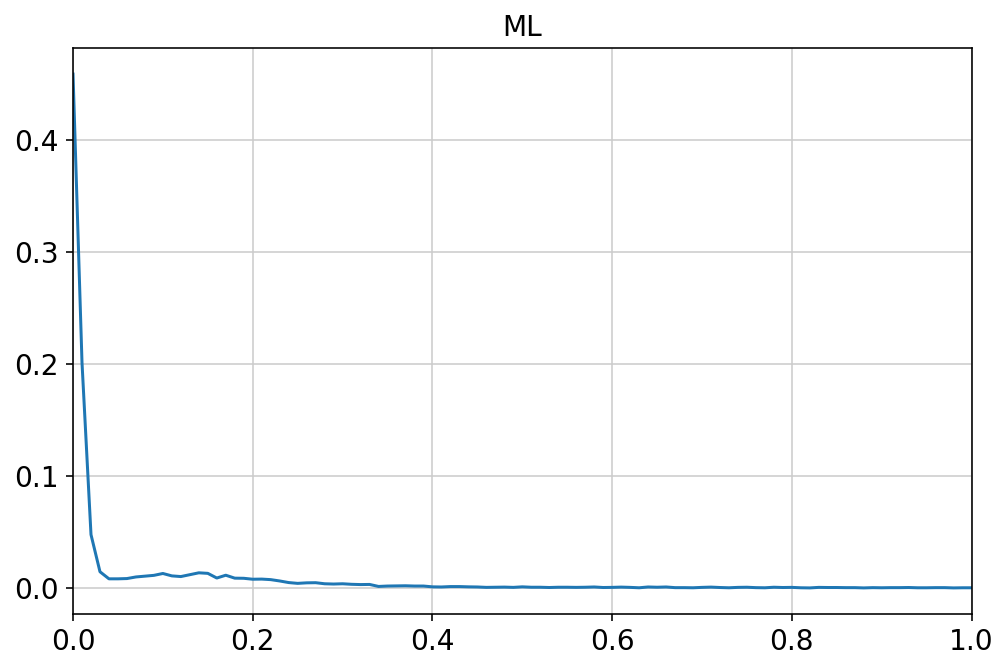

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 100

### debug: proportion separation ### start ###


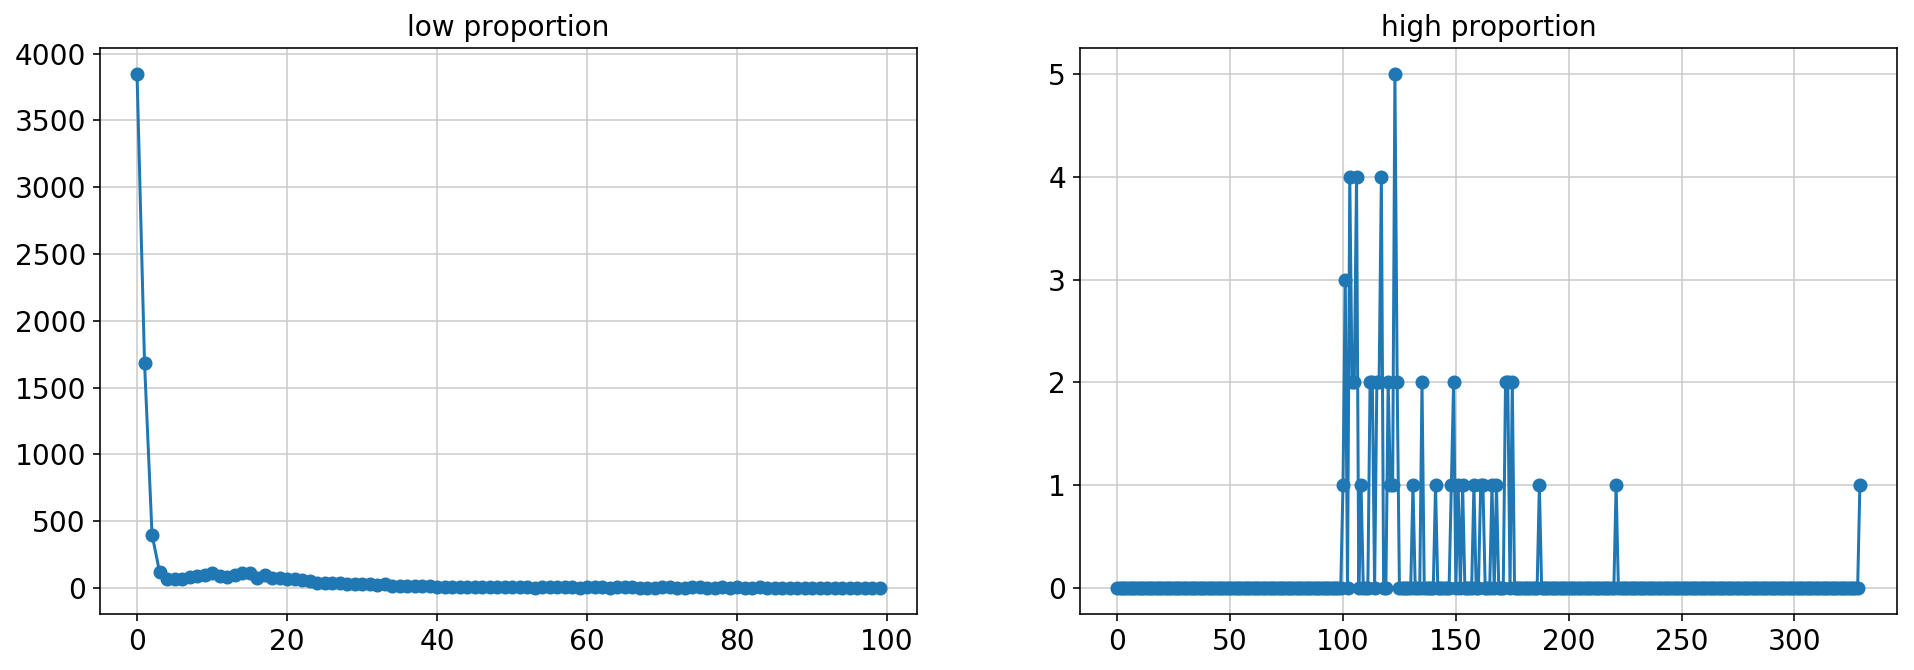

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
6.727438768727723
-13.361024493896423
8.647671902117793
-0.6724184800077637
-1.3418065565318216
Close-form gradients
[  6.72744183 -13.36101378   8.64768151  -0.67240635  -1.34180322]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:2.4555497898039667, reg:0.005347625380124079
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  8.76400075   9.32087886   5.63329599  -6.47088727 -17.24730821]
gamma:100


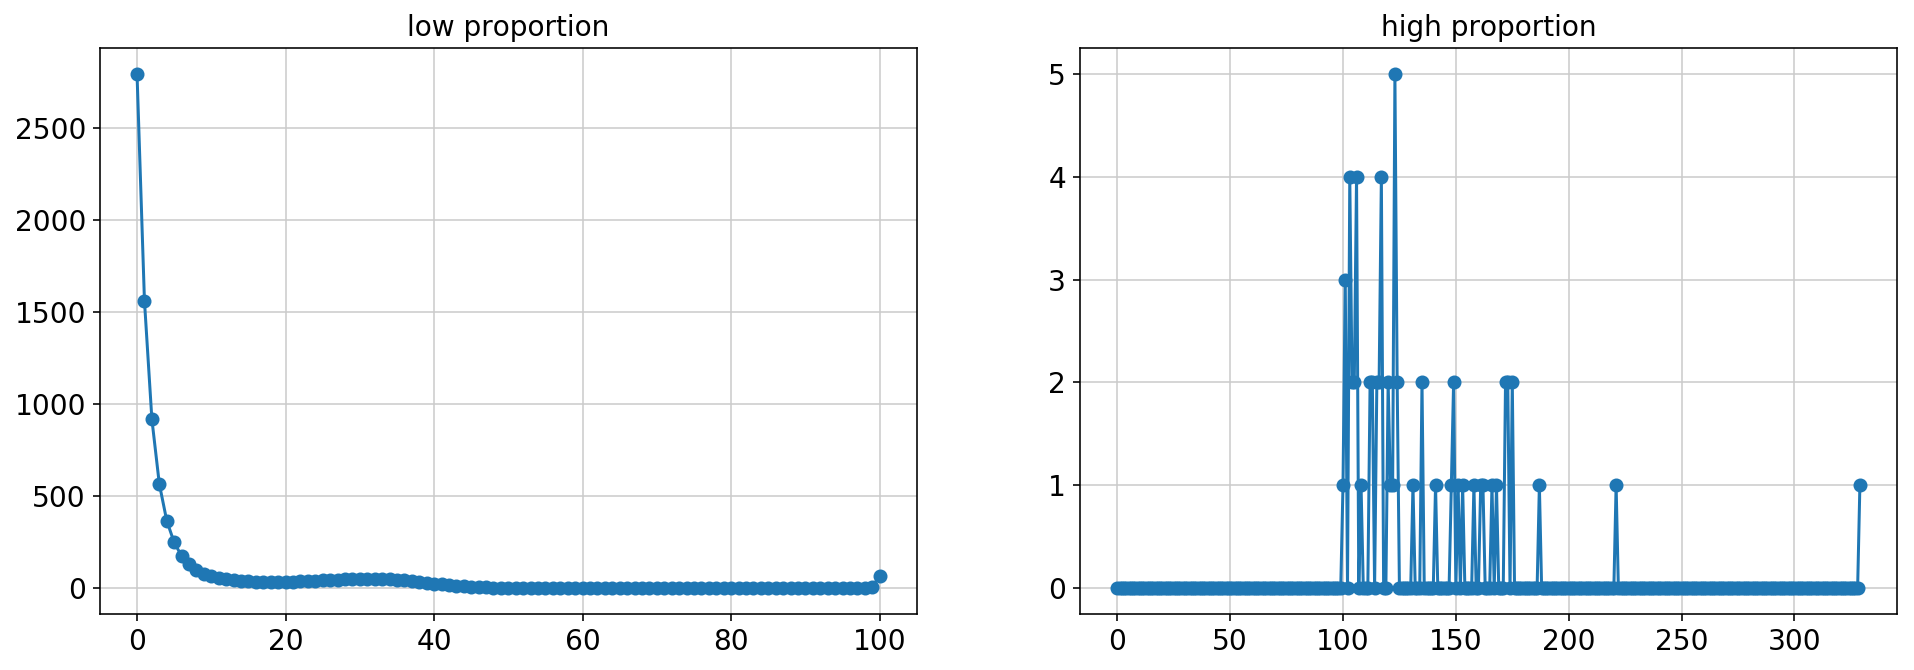

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:329.0


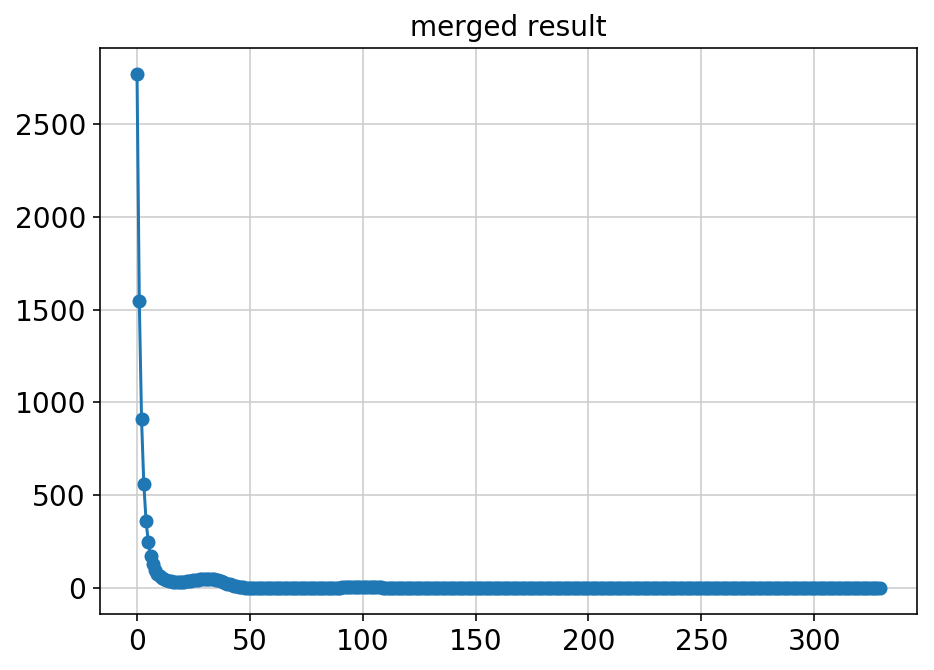

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 13.73%
>0.1: 6.034%
>0.15: 1.613%
>0.2: 1.602%
>0.25: 1.599%
>0.3: 1.101%
>0.35: 0.500%
>0.4: 0.291%


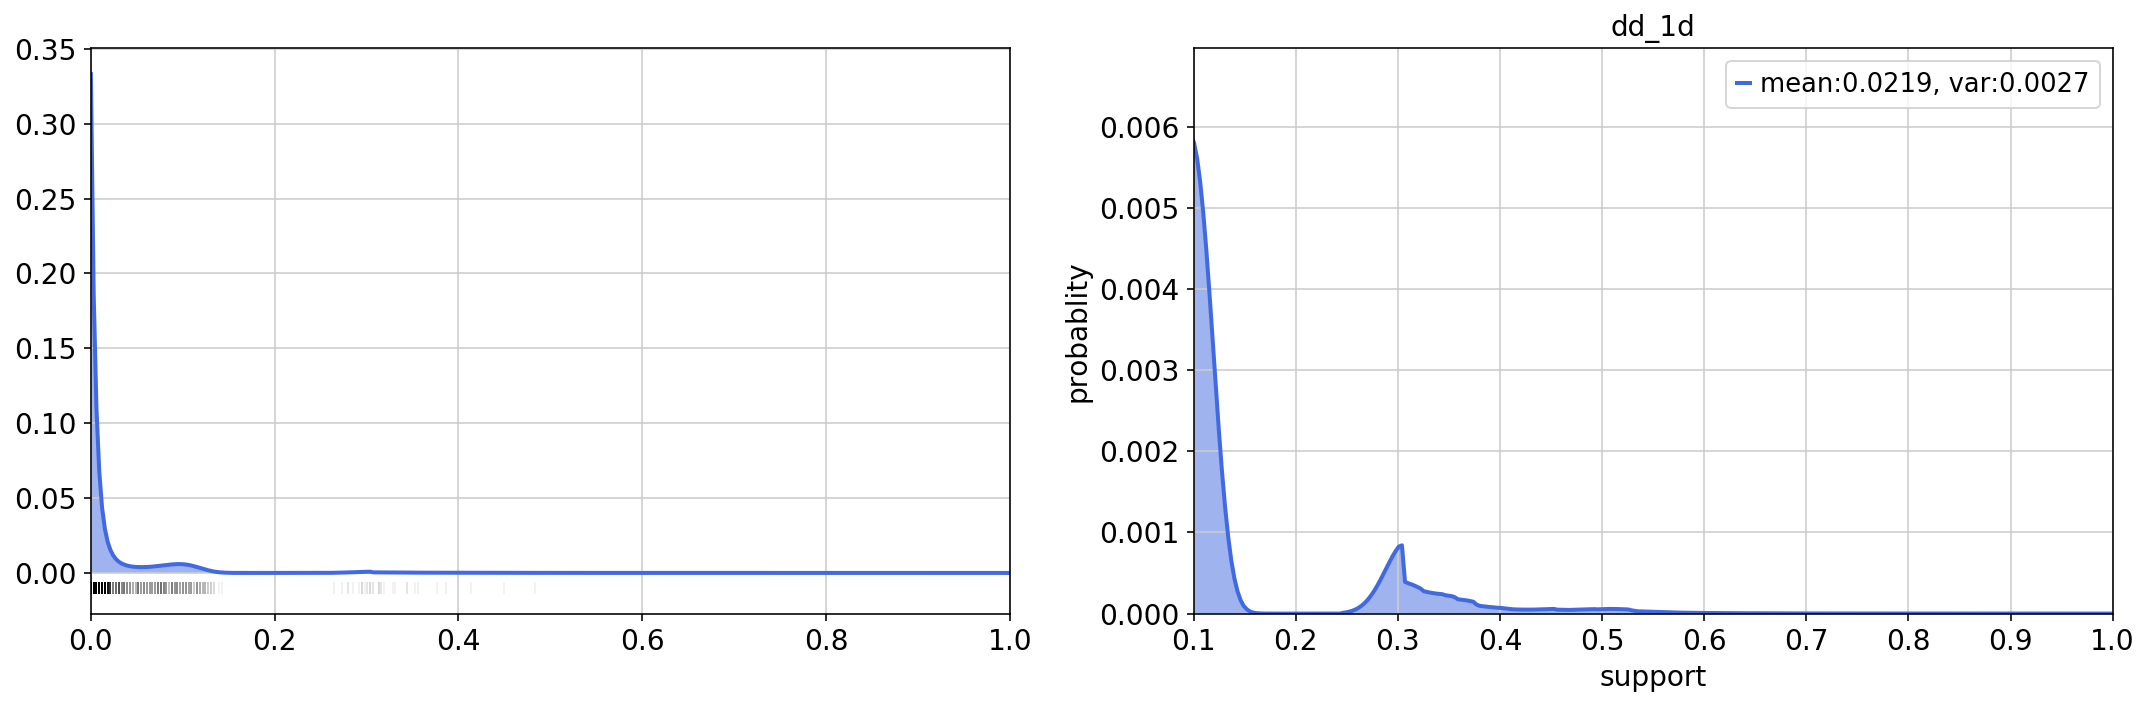

estimated gamma: 329.0


In [125]:
gene='CST3'
Y=np.array(adata[:,gene].X,dtype=int)
print(gene)
print("Average counts per cell =",np.sum(Y)/len(Y))
plt.figure(figsize=[8,5])
sns.distplot(Y)
plt.show()
plt.figure(figsize=[8,5])
p_hat_ml,ml_info=ml_1d(Y)
plt.plot(ml_info['x'],p_hat_ml)
plt.xlim([0,1])
plt.title('ML')
plt.show()

p_hat,dd_info=dd_1d(Y,noise='poi',verbose=1,gamma=None,debug_mode=True)
print("estimated gamma:",dd_info['gamma'])

FTL
Average counts per cell = 27.60064431452094


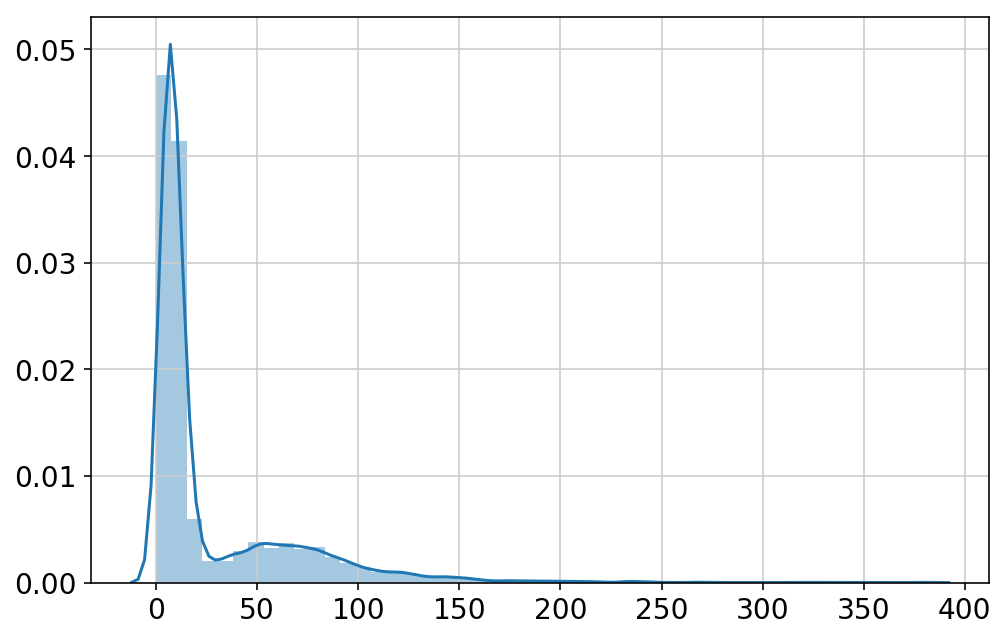

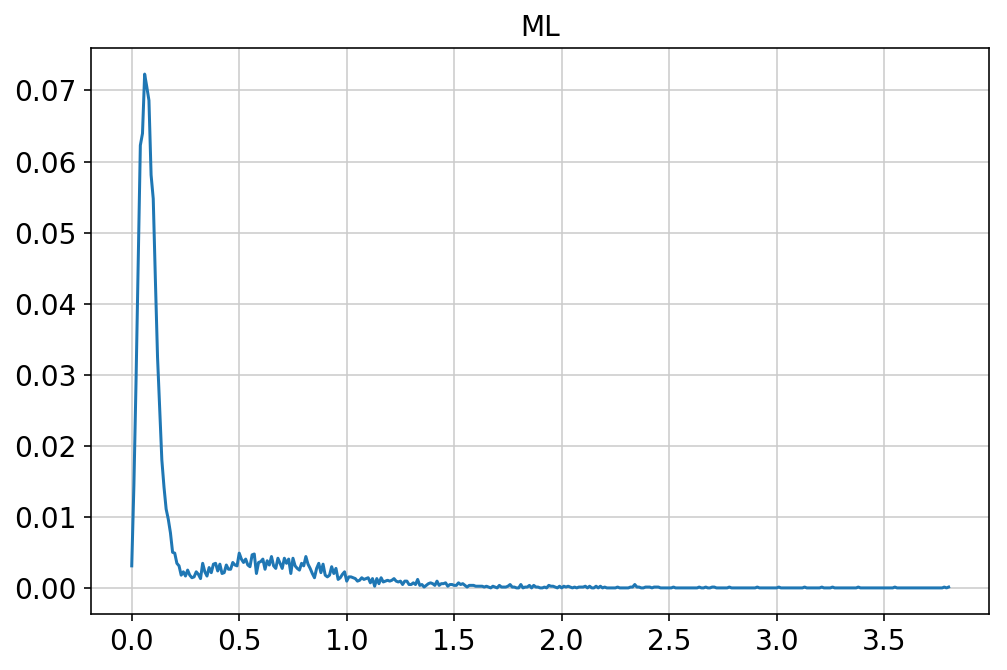

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 100

### debug: proportion separation ### start ###


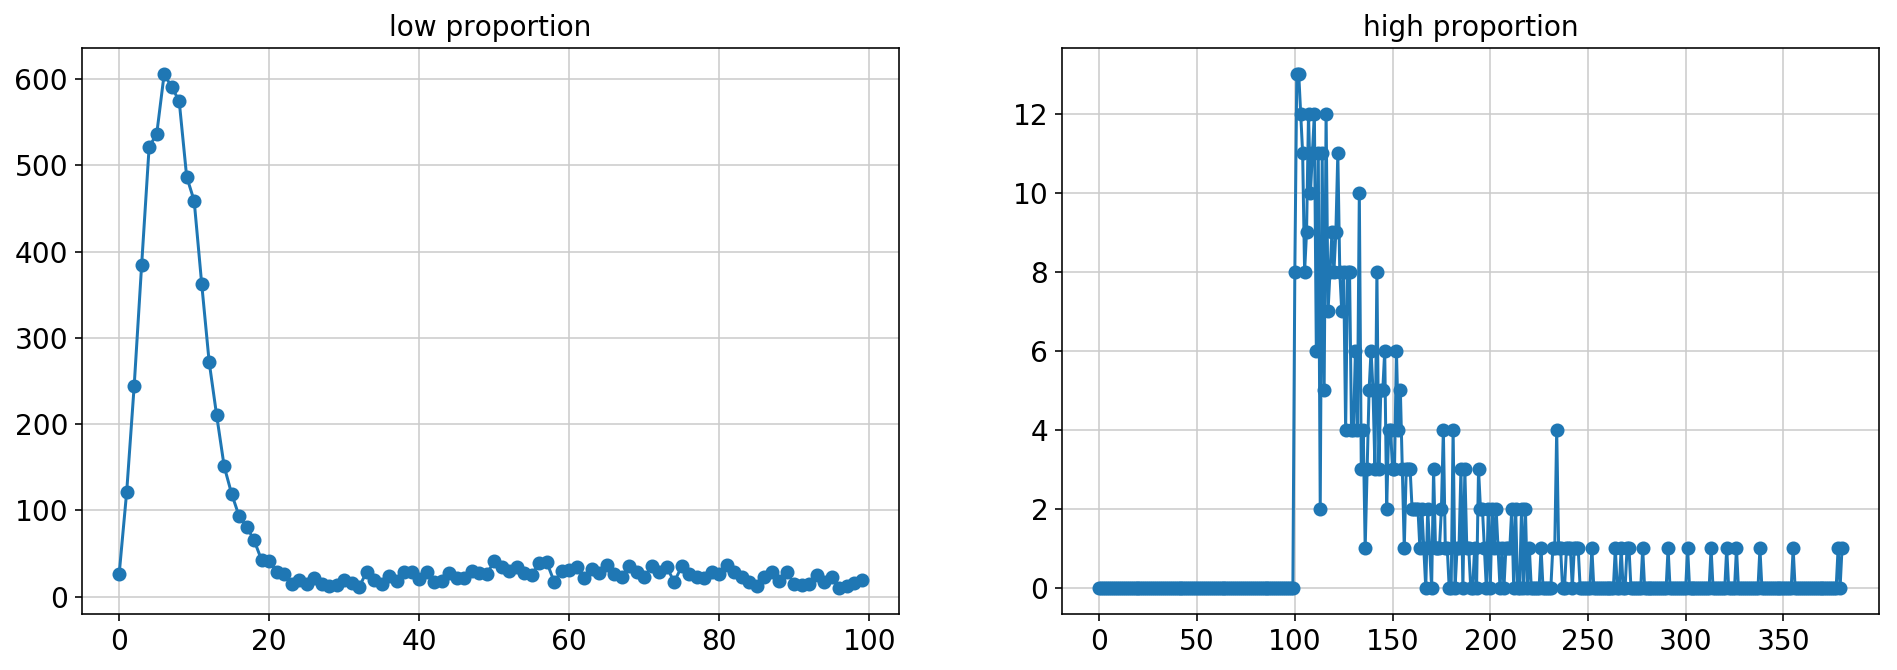

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
3.356890028172188
-6.020673867901394
3.2312169064852014
0.4639422428454054
-1.0315103393665481
Close-form gradients
[ 3.35689285 -6.02066434  3.23122533  0.46395336 -1.03150722]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:3.8889112118400706, reg:0.0001361054044067426
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [ 0.85687686 -1.50798917 -2.22205468  0.55988234  2.31328249]
gamma:100


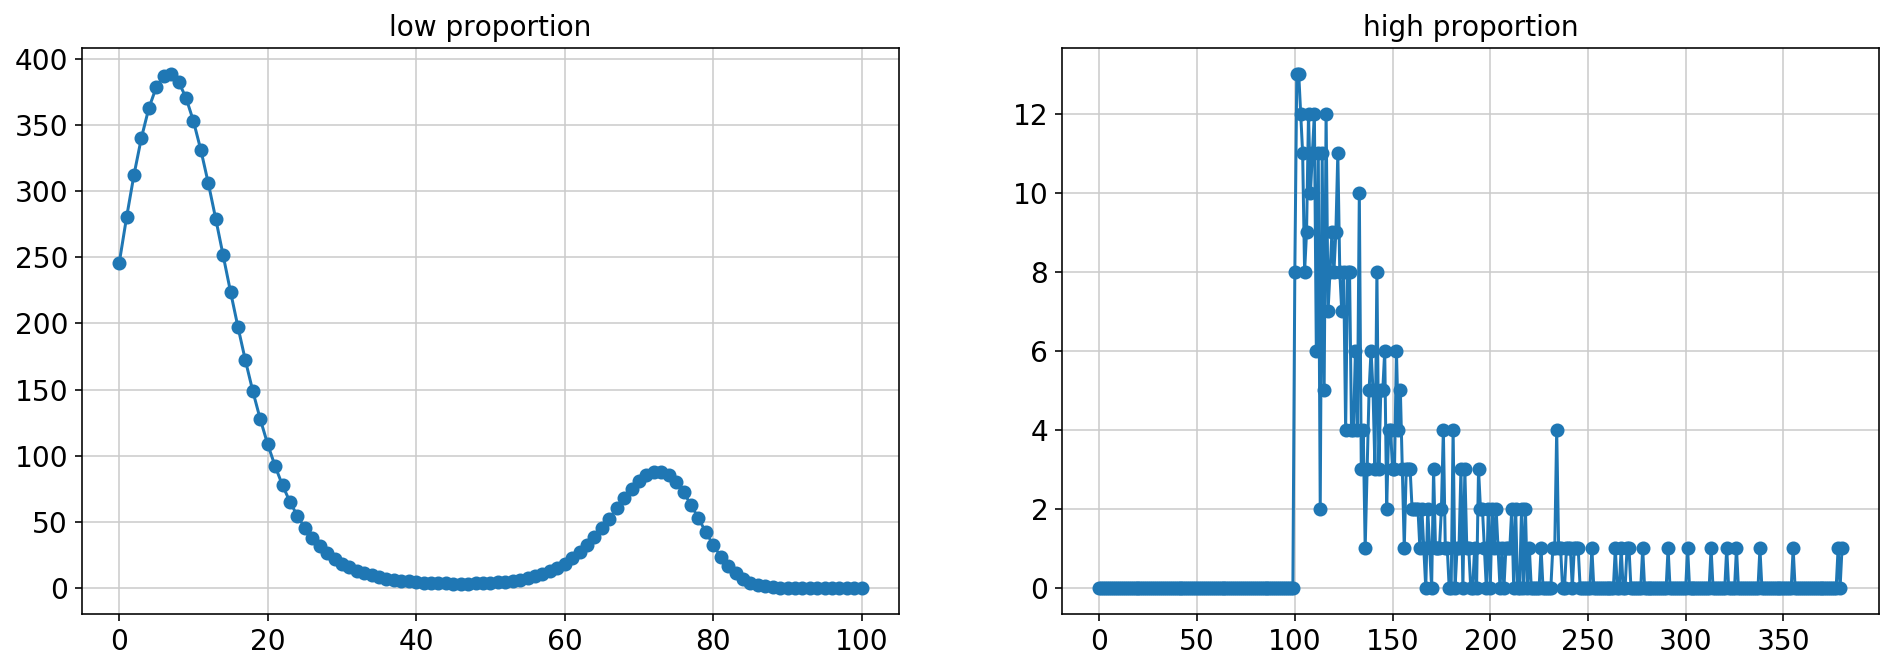

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:380.0


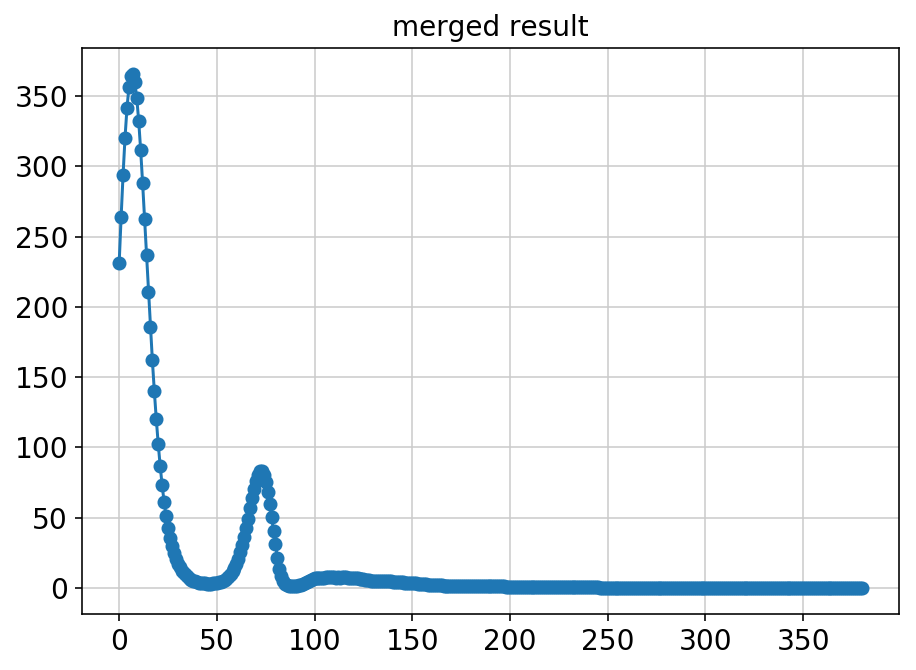

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 30.33%
>0.1: 22.51%
>0.15: 21.41%
>0.2: 8.917%
>0.25: 5.723%
>0.3: 4.057%
>0.35: 2.546%
>0.4: 1.555%


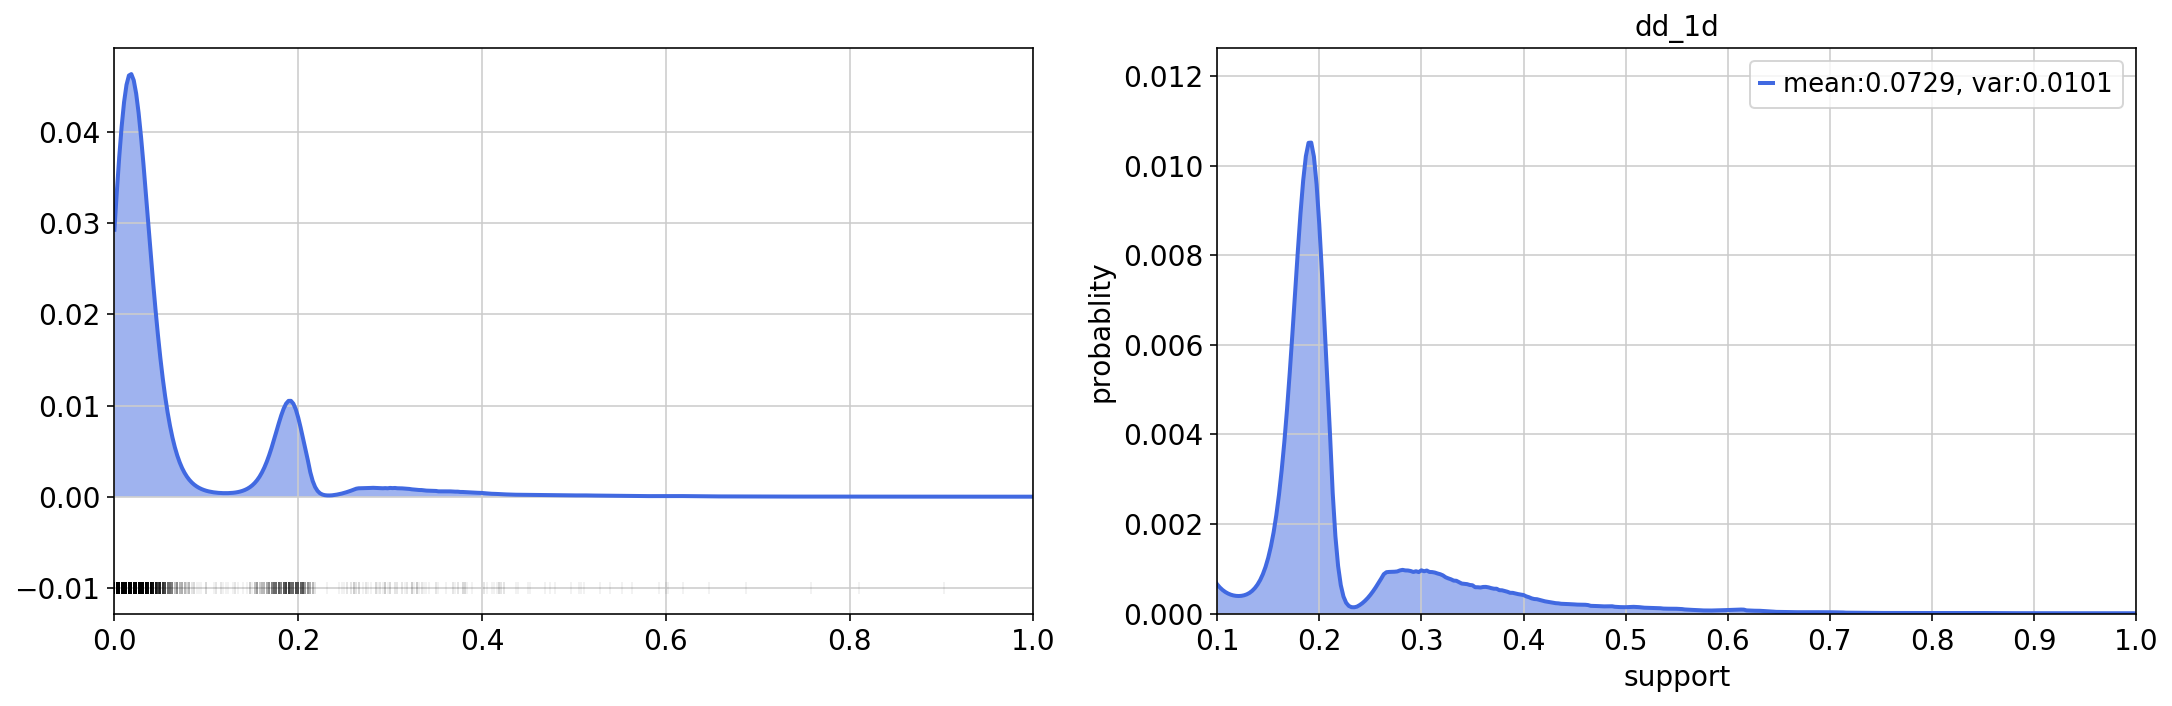

estimated gamma: 380.0


In [126]:
gene='FTL'
Y=np.array(adata[:,gene].X,dtype=int)
print(gene)
print("Average counts per cell =",np.sum(Y)/len(Y))
plt.figure(figsize=[8,5])
sns.distplot(Y)
plt.show()
plt.figure(figsize=[8,5])
p_hat_ml,ml_info=ml_1d(Y)
plt.plot(ml_info['x'],p_hat_ml)
plt.title('ML')
plt.show()

p_hat,dd_info=dd_1d(Y,noise='poi',verbose=1,gamma=None,debug_mode=True)
print("estimated gamma:",dd_info['gamma'])

# plt.figure(figsize=[8,5])
# X=np.random.choice(dd_info['x'], 2000, p=p_hat)
# plt.plot(dd_info['x'],p_hat,marker='.',lw=2,markersize=0,color="royalblue")
# # plt.fill_between(x, p, facecolor='royalblue', alpha=0.5)
# # plt.xlim([0,1])
# # plt.ylim([0,1.05*np.max(p)])
# plt.plot(X, [-0.01]*len(X), '|', color='k',alpha=0.05)
# plt.show()

In [106]:
genes=["S100A9","S100A8","S100A4","LGALS2","FCN1","CD14","GZMB","IGFBP7","CD79A","CD3E","LYZ","MS4A1",
       "GNLY","FGFBP2","FCER1G","LDHB","IL7R","LST1","PF4","NKG7","CST3","CCR7"]

S100A9
Average counts per cell = 16.659587161436583


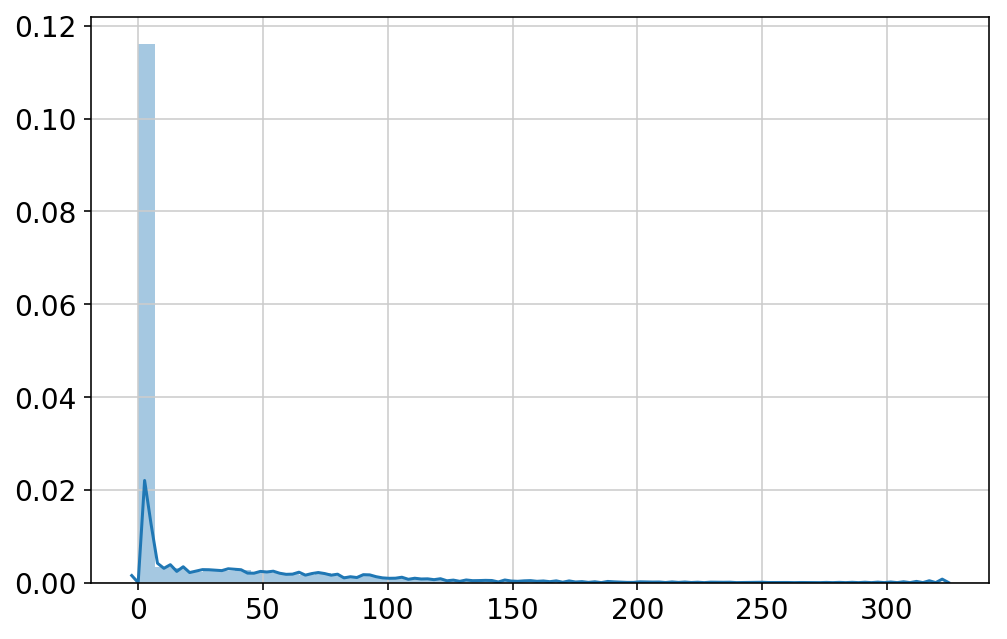

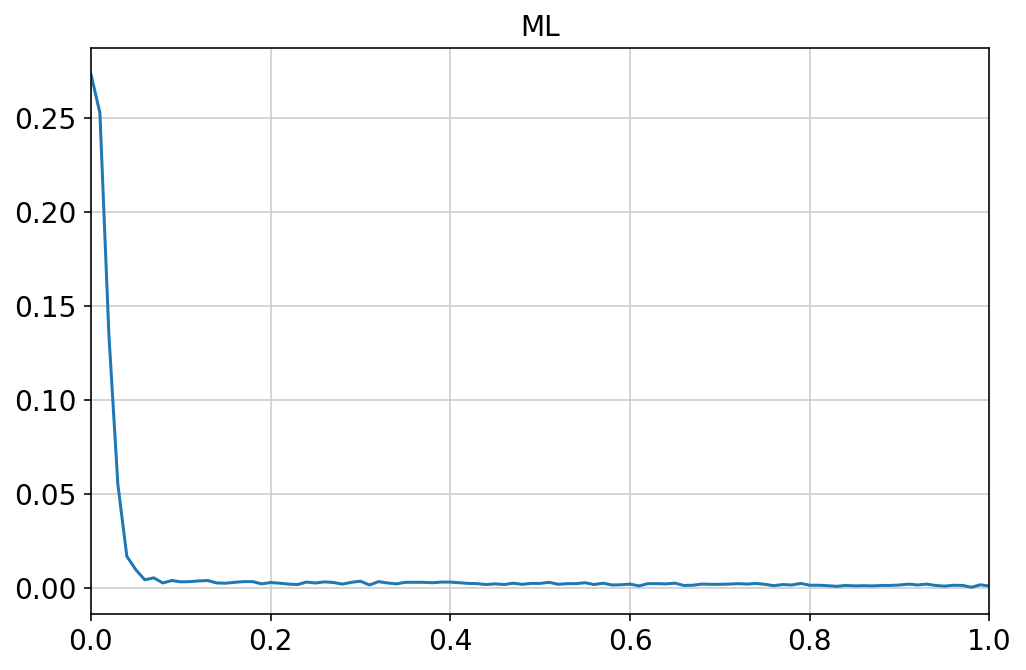

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 100

### debug: proportion separation ### start ###


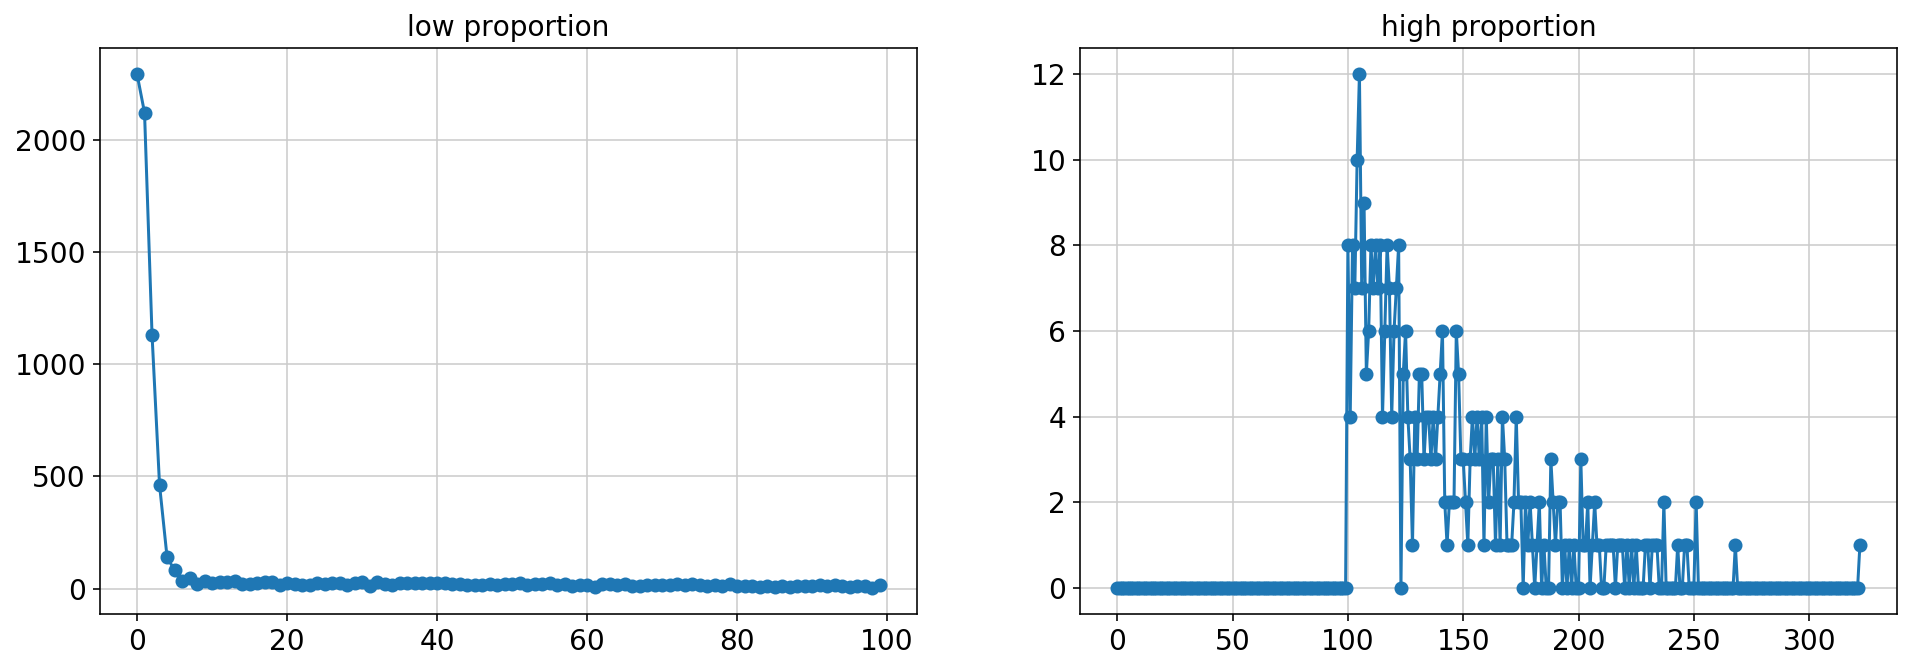

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
6.297455693804466
-12.63193802802931
8.268233533392788
-0.7546506575195622
-1.1792385352649148
Close-form gradients
[  6.29745877 -12.6319273    8.26824285  -0.75463903  -1.17923531]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:2.7681015121739696, reg:1.895120124568836e-05
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [-0.79107408 -0.0160886   0.9030324   0.42587842 -0.52175007]
gamma:100


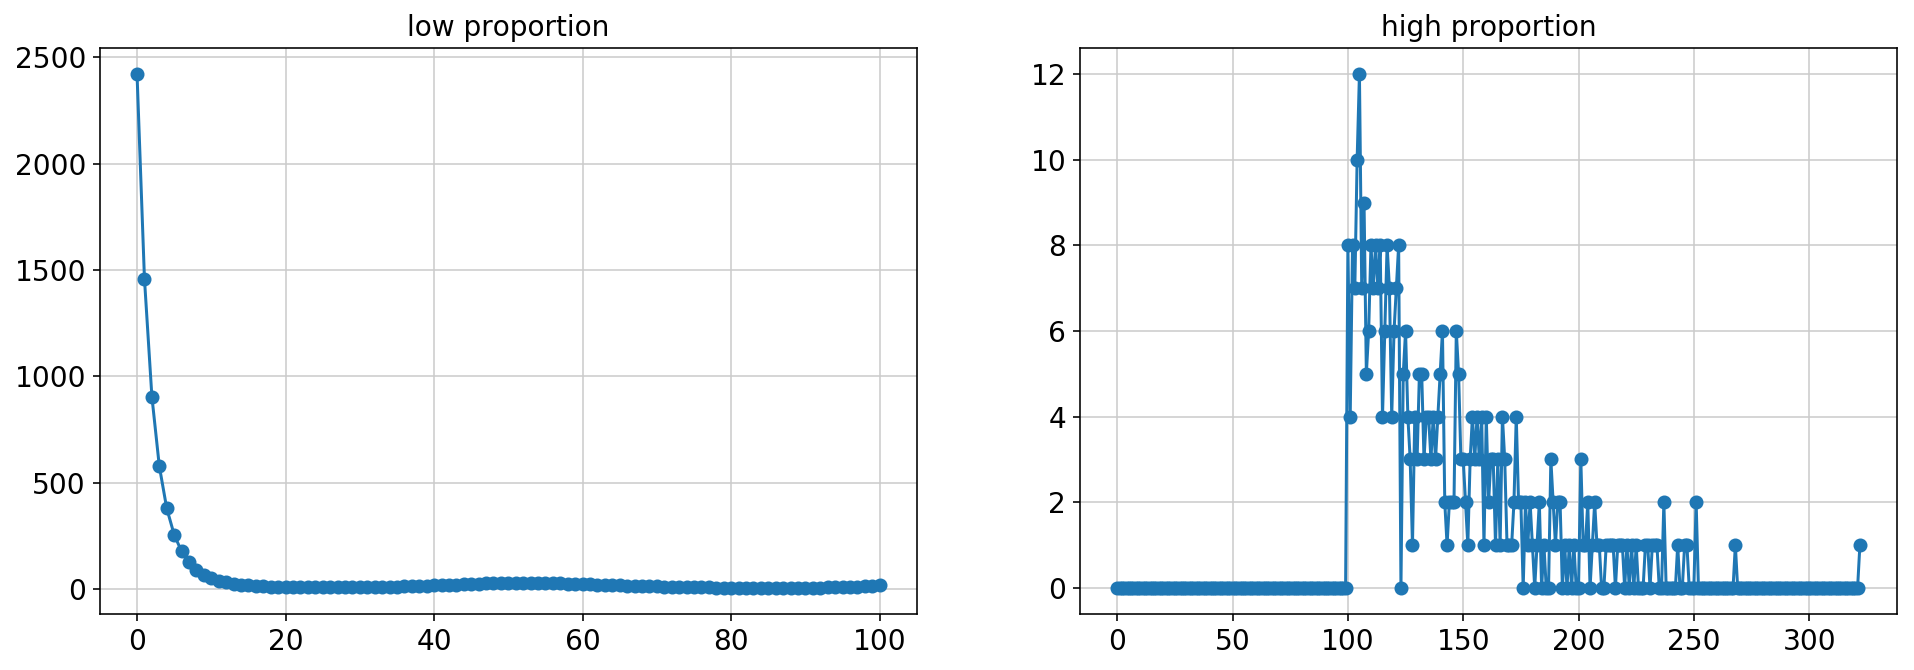

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:322.0


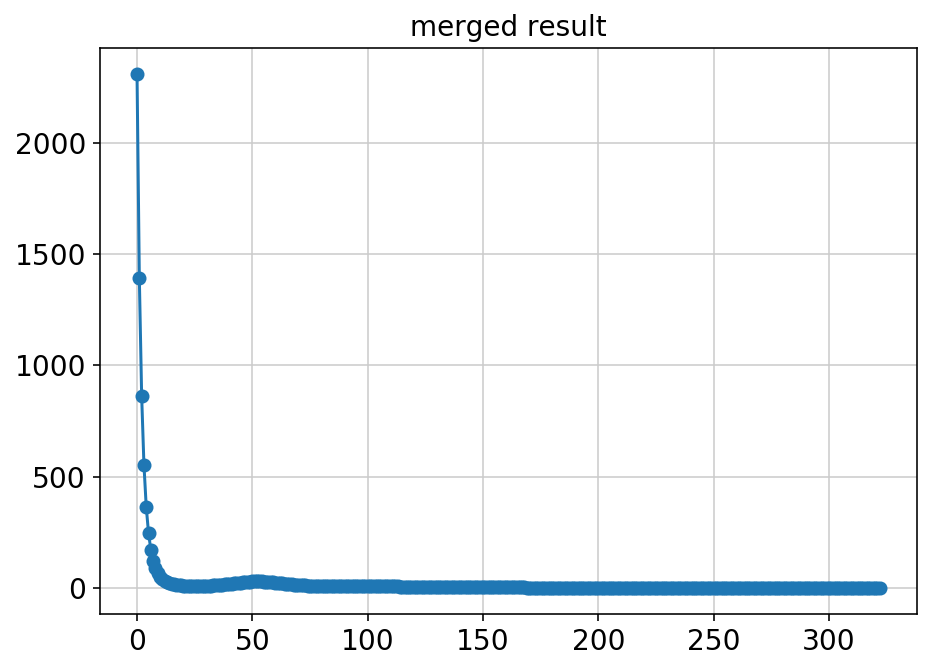

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 20.26%
>0.1: 18.23%
>0.15: 14.46%
>0.2: 9.243%
>0.25: 6.792%
>0.3: 5.066%
>0.35: 3.446%
>0.4: 2.422%


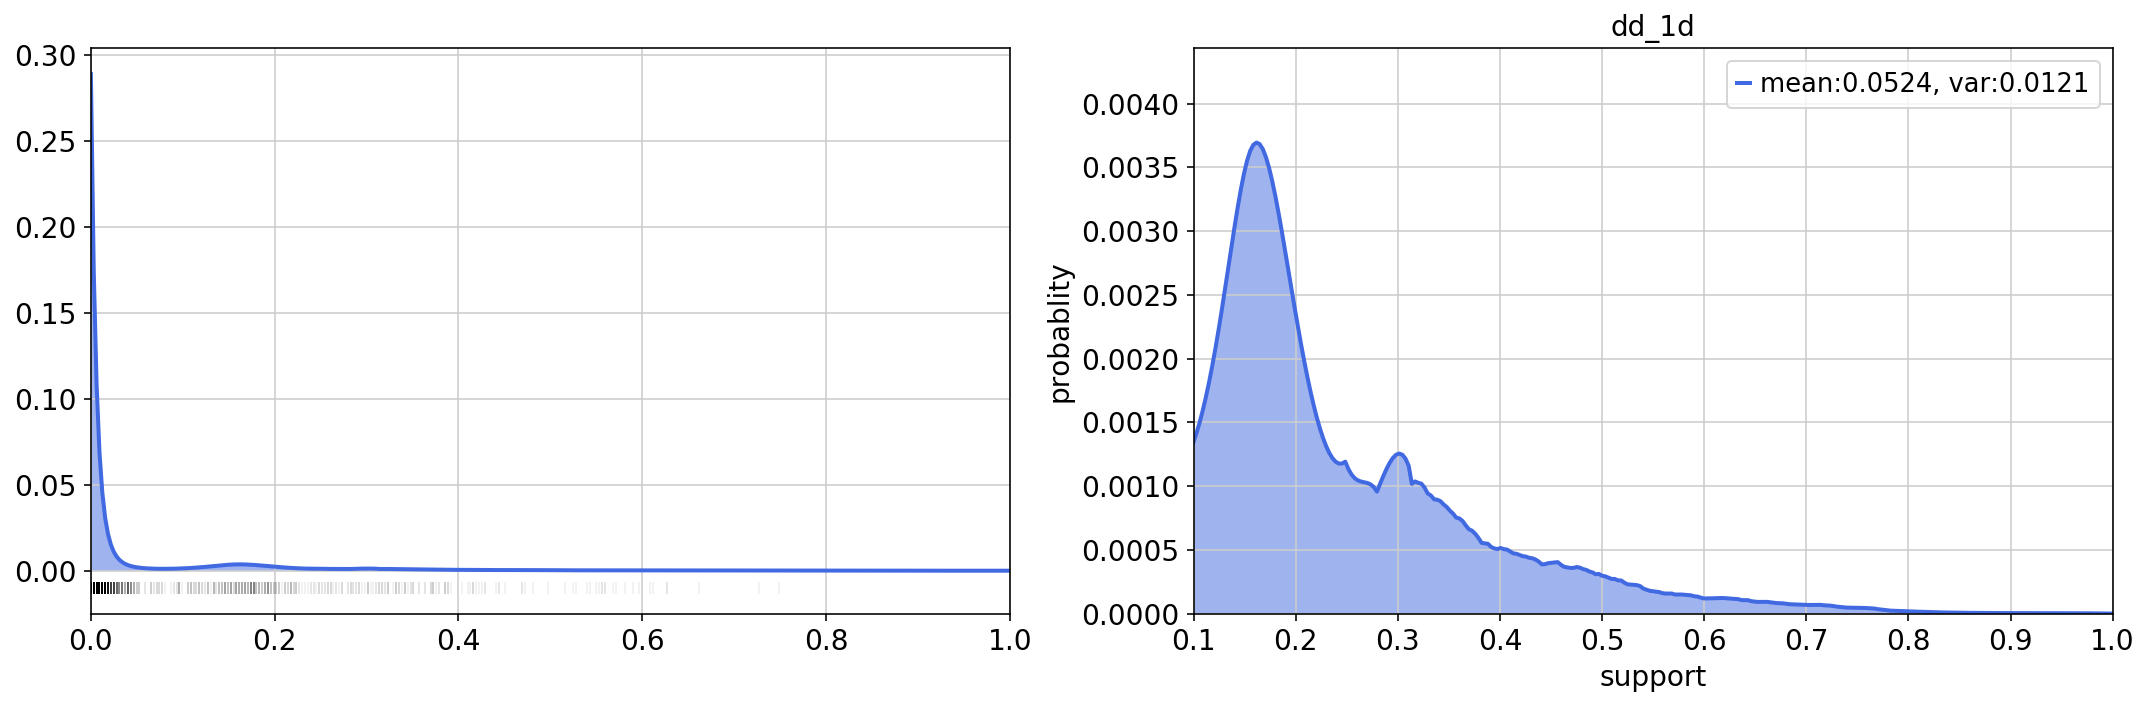

gamma: 322.0
-------------------------------------------------------------------------
S100A8
Average counts per cell = 13.68273475718888


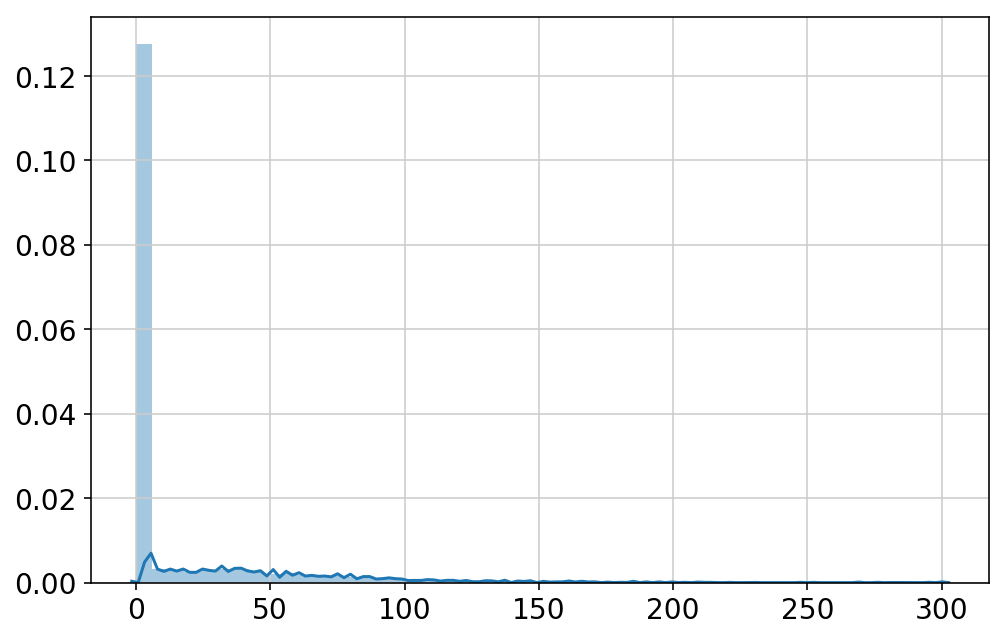

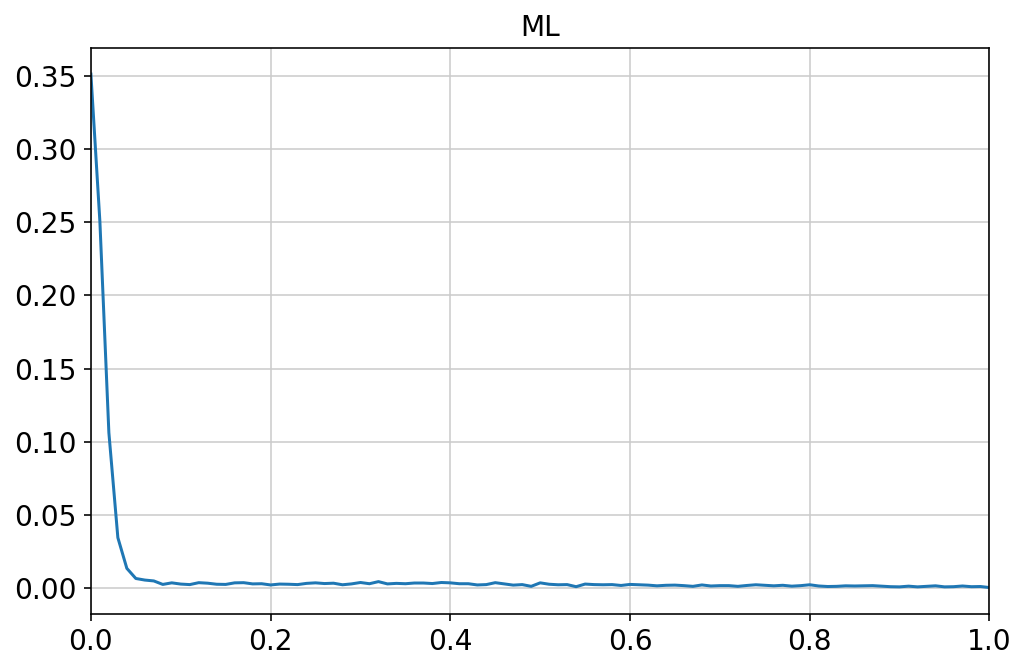

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 100

### debug: proportion separation ### start ###


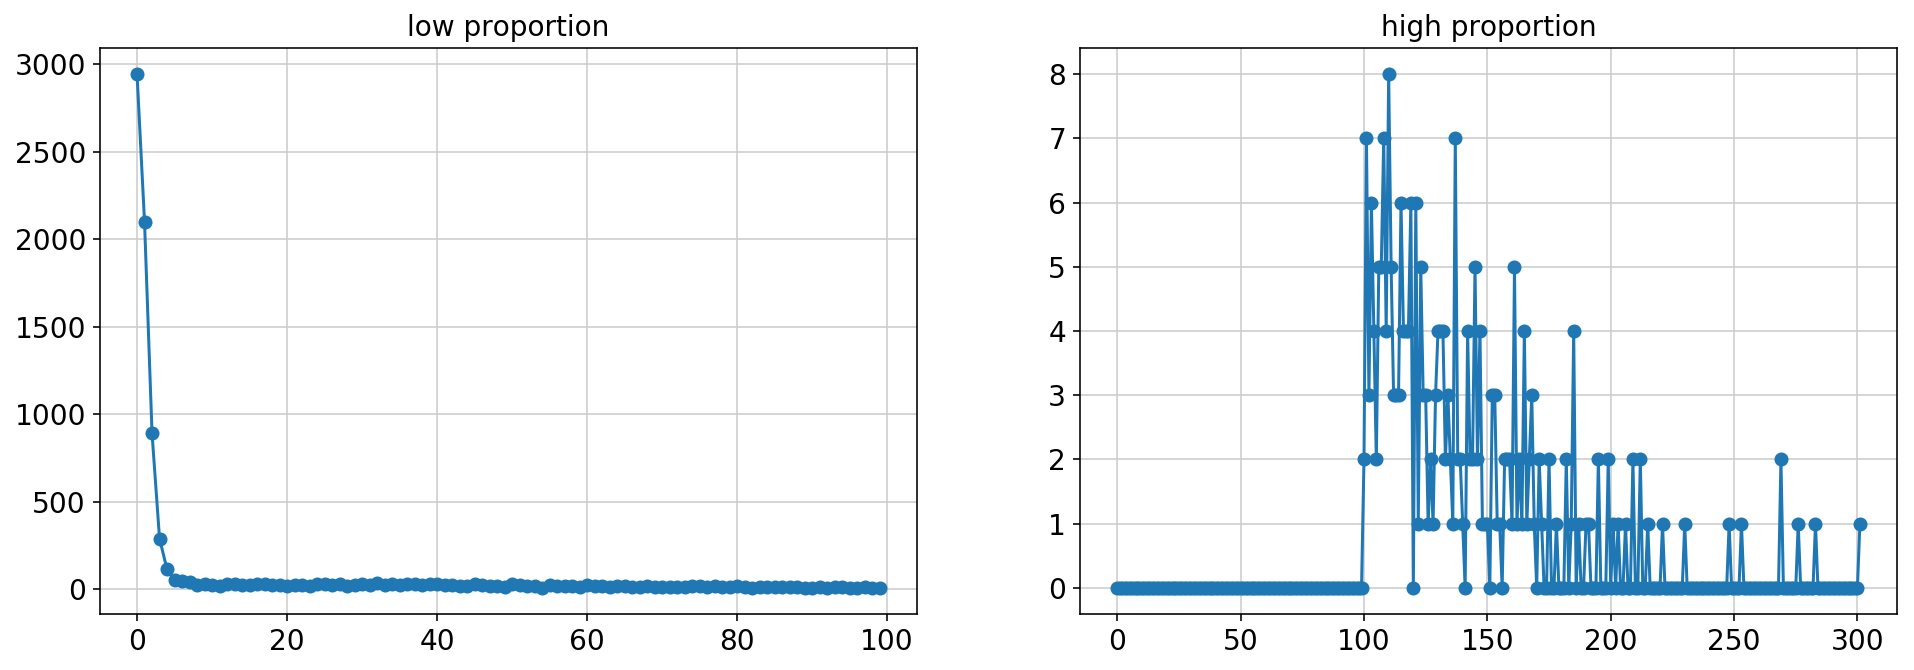

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
6.4674379078866195
-13.00707918439059
8.53825744151493
-0.7850906245110423
-1.2136639391258086
Close-form gradients
[  6.467441   -13.00706833   8.5382669   -0.78507889  -1.21366069]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:2.6160382544136676, reg:3.699389077858707e-05
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [-0.88937374  0.22182096  1.28362716  0.40670793 -1.02278486]
gamma:100


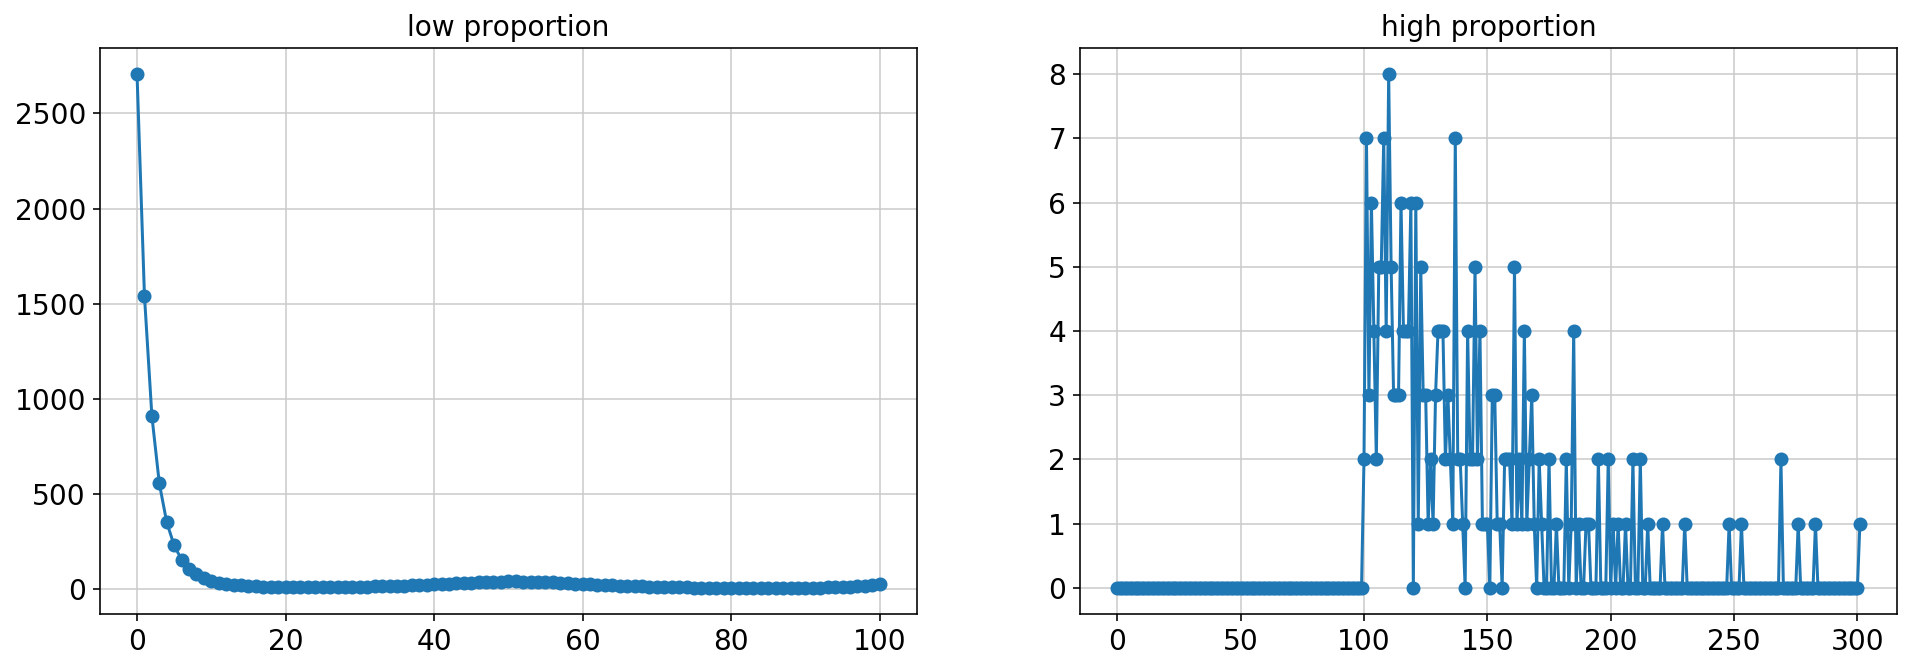

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:301.0


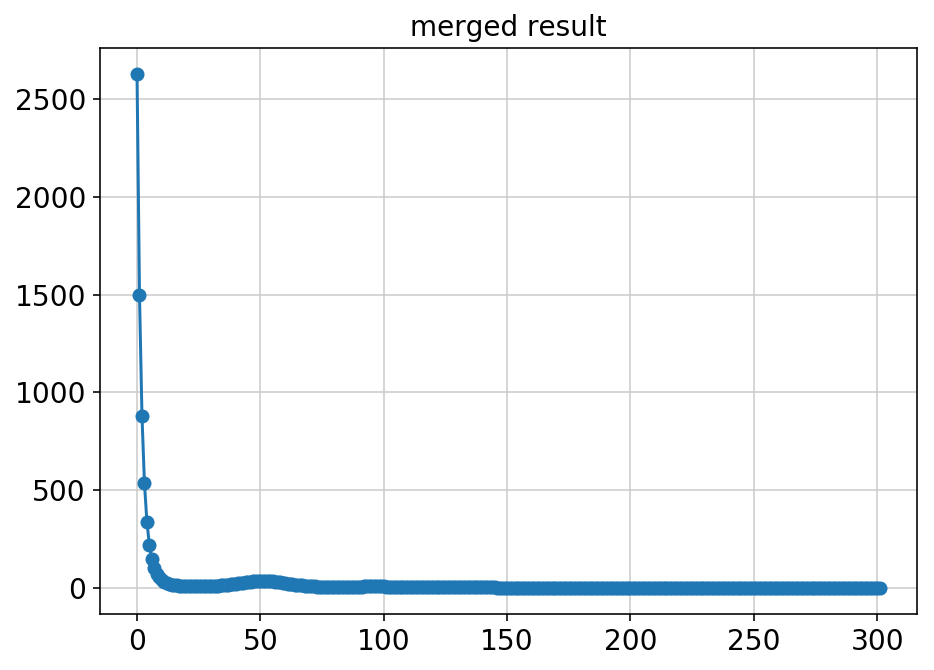

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 18.53%
>0.1: 16.89%
>0.15: 13.37%
>0.2: 7.360%
>0.25: 5.093%
>0.3: 4.061%
>0.35: 2.682%
>0.4: 1.844%


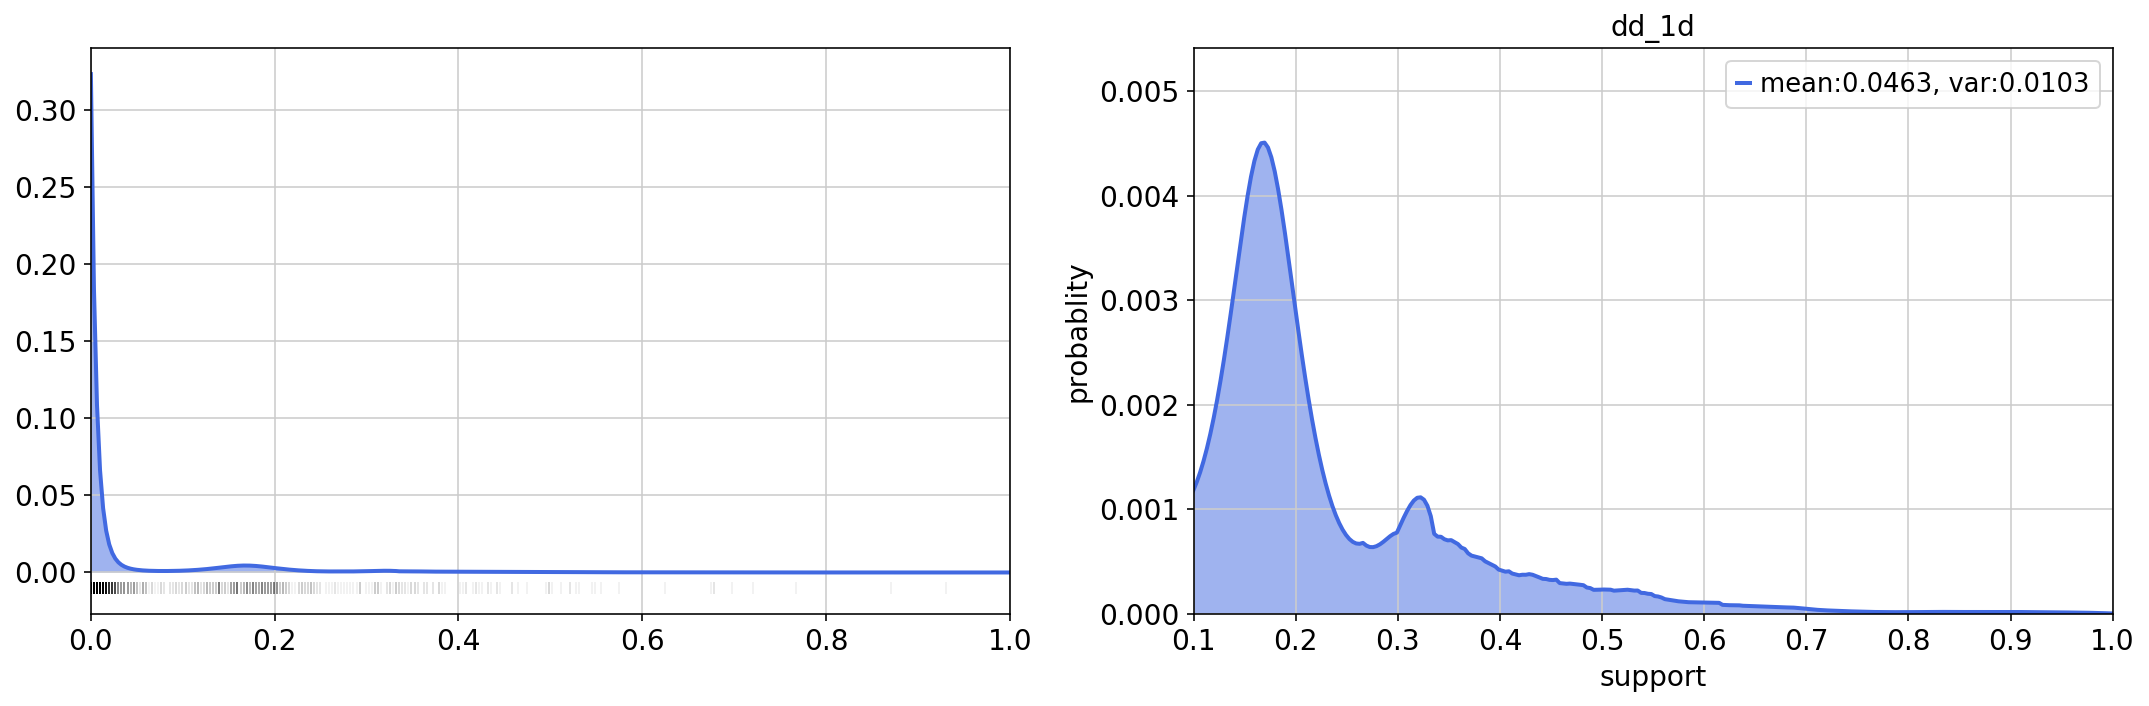

In [ ]:
for gene in genes:
    Y=np.array(adata[:,gene].X,dtype=int)
    print(gene)
    print("Average counts per cell =",np.sum(Y)/len(Y))
    plt.figure(figsize=[8,5])
    sns.distplot(Y)
    plt.show()
    plt.figure(figsize=[8,5])
    p_hat_ml,ml_info=ml_1d(Y)
    plt.plot(ml_info['x'],p_hat_ml)
    plt.xlim([0,1])
    plt.title('ML')
    plt.show()

    p_hat,dd_info=dd_1d(Y,noise='poi',verbose=1,gamma=None,debug_mode=True)
    print("gamma:",dd_info['gamma'])
    print("-------------------------------------------------------------------------")

In [ ]:
def plot_density_1d(p,x):
    M1,M2 = moments(p,x)
    plt.figure(figsize=[8,5])
    plt.plot(x,p,marker='.',lw=2,markersize=0,color="royalblue",label='mean:%s, var:%s'%(str(M1)[0:6],str(M2-M1**2)[0:6]))
    plt.fill_between(x, p, facecolor='royalblue', alpha=0.5)
    plt.xlim([0,1])
    plt.ylim([0,1.05*np.max(p)])
    
    
#     plt.bar(x,p,label='mean:%s, var:%s'%(str(M1)[0:6],str(M2-M1**2)[0:6]))
    

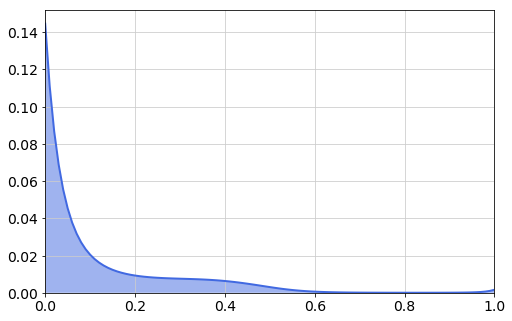

In [218]:
plot_density_1d(p_hat,dd_info['x'])